In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [3]:
model="deepseek-r1-distill-llama-70b"

### Load the model

In [4]:
from langchain_groq import ChatGroq


In [5]:
llm=ChatGroq(model_name=model)

In [6]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.0887817, 'prompt_time': 0.000120948, 'queue_time': 0.093594994, 'total_time': 0.088902648}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--c2fce793-bb5d-4284-8d27-c178fc231cef-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [7]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [8]:
# import operator
# from typing import List
# from langgraph.graph.message import add_messages
# from pydantic import BaseModel , Field
# from typing import TypedDict, Annotated, Sequence
# from langchain_core.messages import BaseMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [9]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [10]:
# HumanMessage("hi how are you?")

In [11]:
# HumanMessage(["hi how are you?"])

### this code is only for the testing

In [16]:

state={"messages":["hi hello how are you?"]}
call_model(state)


{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 9, 'total_tokens': 47, 'completion_time': 0.190063873, 'prompt_time': 0.000203207, 'queue_time': 0.095049979, 'total_time': 0.19026708}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f92802c2-a09b-421c-bccd-2e48643da41b-0', usage_metadata={'input_tokens': 9, 'output_tokens': 38, 'total_tokens': 47})]}

In [ ]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

## Design a simple workflow without tool calling/

In [17]:
workflow=StateGraph(MessagesState)

In [18]:
workflow.add_node("mybot",call_model)

In [19]:
workflow.add_edge(START,"mybot")

In [20]:
workflow.add_edge("mybot",END)

In [21]:
app=workflow.compile()

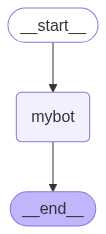

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
input={"messages":["What is the capital of France?"]}

In [26]:
app.invoke(input)

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='f95fe778-8767-4dec-9499-b61324132236'),
  AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.046285843, 'prompt_time': 0.000192267, 'queue_time': 0.093800323, 'total_time': 0.04647811}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f57a0d71-35f3-464c-9547-2ab846b3c3e0-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})]}

In [29]:
for output in app.stream(input):
    # print(output)
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.049993369, 'prompt_time': 0.000187277, 'queue_time': 0.097860738, 'total_time': 0.050180646}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--183b3c21-aed8-49b2-9bd8-21f6a6123e9d-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})]}




### this is a workflow with tool calling

In [30]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

## testing a tool

In [31]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [97]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [32]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000222D1F820C0>)

In [33]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, I can tell you that Delhi typically experiences a hot and humid climate during the summer months (April to June), with temperatures often reaching above 40°C (104°F). The monsoon season usually starts in July and lasts until September, bringing heavy rainfall and humidity. Winters in Delhi (December to February) are cool and foggy, with temperatures ranging from 2°C to 15°C (36°F to 59°F). For the most accurate and up-to-date weather information, please check a reliable weather service or app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 11, 'total_tokens': 144, 'completion_time': 0.483636364, 'prompt_time': 0.000303087, 'queue_time': 0.096446001, 'total_time': 0.483939451}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': No

### Binding a tool to the LLM

### Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [90]:
tools=[search]

In [91]:
llm_with_tool=llm.bind_tools(tools)

### testig my llm_with_tool

In [92]:
response=llm_with_tool.invoke("what is a weather in paris?")

In [93]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'q8sxy06mx', 'function': {'arguments': '{"query":"weather in Paris"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 132, 'total_tokens': 283, 'completion_time': 0.689832063, 'prompt_time': 0.008452302, 'queue_time': 0.095100052, 'total_time': 0.698284365}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--22a6dfab-9437-4eb7-ae60-fc5541a9fc16-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Paris'}, 'id': 'q8sxy06mx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 151, 'total_tokens': 283})

In [94]:
response.content

''

In [95]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Paris'},
  'id': 'q8sxy06mx',
  'type': 'tool_call'}]

In [96]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

### Testing code

In [97]:
input={"messages":["what is a weather in delhi?"]}

In [98]:
response=call_model(input)

In [99]:
response["messages"][-1].content

''

In [100]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': '8r6k8hext',
  'type': 'tool_call'}]

### here my router function

#### now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [101]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [102]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000222D1F820C0>)]

In [103]:

tool_node=ToolNode(tools)

In [108]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000222D1F820C0>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [109]:
workflow2=StateGraph(MessagesState)

In [110]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"toolls":"mytools",
                                 END:END})

In [111]:
app2=workflow2.compile()

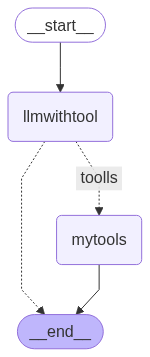

In [112]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [60]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [61]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [62]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='289b92c9-635c-4692-a467-e26681db8cce'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'grez0q2cw', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 133, 'total_tokens': 231, 'completion_time': 0.406973012, 'prompt_time': 0.008554001, 'queue_time': 0.094521607, 'total_time': 0.415527013}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2383d6e2-0cdd-48f6-9117-e825bdd3c274-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'grez0q2cw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 98, 'total_tokens': 231}),
  ToolMessage(content='the temp is 45 degree and sunny', name='search',

### use good resoning based model

In [63]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='15270d57-8e2c-42fa-86ed-fa911d230827'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 130, 'total_tokens': 289, 'completion_time': 0.593856039, 'prompt_time': 0.008356911, 'queue_time': 0.09600442000000001, 'total_time': 0.60221295}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f316bb54-2d68-4943-88c8-ec8f96cbe8e0-0', usage_metadata={'input_tokens': 130, 'output_tokens': 159, 'total_tokens': 289})]}

In [64]:
workflow2.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [65]:
app3=workflow2.compile()

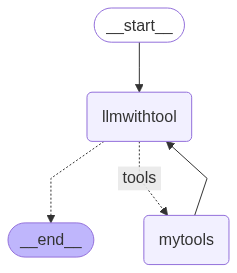

In [66]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [69]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    # print(output)
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1vef8y71g', 'function': {'arguments': '{"query":"weather in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 134, 'total_tokens': 237, 'completion_time': 0.489024119, 'prompt_time': 0.015446799, 'queue_time': 0.094153683, 'total_time': 0.504470918}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dbd402fb-84ba-46b8-837e-31bd2ed7e470-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in New Delhi'}, 'id': '1vef8y71g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 103, 'total_tokens': 237})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='9ff87a0a-b873-4f20-a461-01c61a3eab9f

In [70]:
"what is a weather in delhi can you tell me some good hotel for staying in north delhi"

'what is a weather in delhi can you tell me some good hotel for staying in north delhi'

In [71]:
from langgraph.checkpoint.memory import MemorySaver

In [72]:
memory=MemorySaver()

In [73]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

In [74]:
app4=workflow3.compile(checkpointer=memory)

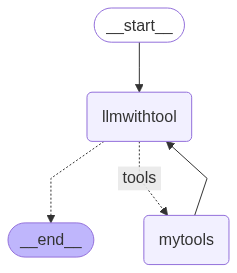

In [75]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [76]:
config={"configurable": {"thread_id": "1"}}

In [77]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [79]:
for event in events:
    event["messages"][-1].pretty_print()
    

In [80]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [81]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (9948v05ct)
 Call ID: 9948v05ct
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (dp05dvm82)
 Call ID: dp05dvm82
  Args:
    query: weather in Indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The weather in Indore is currently 25 degrees and cloudy.


In [82]:
config

{'configurable': {'thread_id': '1'}}

In [83]:
memory.get(config)

{'v': 3,
 'ts': '2025-07-05T07:48:23.028618+00:00',
 'id': '1f059746-d1e9-6b64-800c-053404c31e44',
 'channel_versions': {'__start__': '00000000000000000000000000000009.0.4495426043786539',
  'messages': '00000000000000000000000000000014.0.4949710388409614',
  'branch:to:llmwithtool': '00000000000000000000000000000014.0.6657416116439389',
  'branch:to:mytools': '00000000000000000000000000000013.0.7525348026725275'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000008.0.9445021520501545'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000013.0.3529345239800121'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000012.0.9258878533414896'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='710c51b6-f81f-4609-9ebd-bd522af75324'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ykb5jskp0', 'function': {

In [84]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [85]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================

The city where the temperature was 25 degrees is **Indore**.


In [86]:
memory.get(config)

{'v': 3,
 'ts': '2025-07-05T07:48:47.669232+00:00',
 'id': '1f059747-bce7-6763-800f-714fde9cc65b',
 'channel_versions': {'__start__': '00000000000000000000000000000016.0.0728451748775828',
  'messages': '00000000000000000000000000000017.0.8858377647778468',
  'branch:to:llmwithtool': '00000000000000000000000000000017.0.4065106254772525',
  'branch:to:mytools': '00000000000000000000000000000013.0.7525348026725275'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000015.0.3690436159968079'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000016.0.2080547025952686'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000012.0.9258878533414896'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='710c51b6-f81f-4609-9ebd-bd522af75324'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ykb5jskp0', 'function': {